Import All Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense,Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense,Dropout
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

Prepare Data from CSV

In [2]:
data = pd.read_csv("merged_datasets.csv",header="infer")
data = data.drop(columns=["HUMAN PLAYER POSITION (X) metres","HUMAN PLAYER POSITION (Y) metres","INITITAL VELOCITY OF SHUTTELCOCK(m/s)","INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)","SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)","OUT_OF_COURT_SHOTS"])
data = data.rename(columns={"SHUTTLECOCK POSITIION IN AIR(X ) metres":"X","SHUTTLECOCK POSITIION IN AIR(Y) metres":"Y","SHUTTLECOCK POSITIION IN AIR(Z) metres":"Z"})

Split Dataset

In [3]:
numShots = data["SHOT_ID"].max()
print(numShots)
trainsetSize = int(numShots*0.7)
print(trainsetSize)
testsetSize = numShots-trainsetSize
traindata = data.loc[data["SHOT_ID"]<= trainsetSize]
testdata = data.loc[data["SHOT_ID"] > trainsetSize]
print(traindata.head())
print(testdata.head())



520
364
   SHOT_ID         X    Y         Z
0        1  4.049659  1.0  1.685961
1        1  4.100141  1.0  1.770894
2        1  4.147209  1.0  1.852351
3        1  4.197915  1.0  1.935086
4        1  4.246229  1.0  2.013513
       SHOT_ID         X    Y         Z
39158      365  4.049659  1.0  1.685961
39159      365  4.100141  1.0  1.770894
39160      365  4.147209  1.0  1.852351
39161      365  4.197915  1.0  1.935086
39162      365  4.246229  1.0  2.013513


Normalize Data

In [ ]:
scale = MinMaxScaler()
traindata[["X","Y","Z"]] = scale.fit_transform(traindata[["X","Y","Z"]])
testdata[["X","Y","Z"]] = scale.fit_transform(testdata[["X","Y","Z"]])
print(traindata.head())
print(testdata.head())

Sequence Function

In [4]:
def prepare_data(data, sequence_length):
    X = []
    Y = []
    for shot_id in data['SHOT_ID'].unique():
        shot_data = data.loc[data['SHOT_ID'] == shot_id][['X', 'Y', 'Z']].values
        for i in range(len(shot_data) - sequence_length):
            sequence = shot_data[i:i+sequence_length]
            X.append(sequence)
            Y.append(shot_data[i+sequence_length])
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

Create Sequence for test and train

In [5]:
sequence_length =15
X_train, Y_train = prepare_data(traindata, sequence_length)
print(X_train.dtype,Y_train.dtype)



X_test, Y_test = prepare_data(testdata, sequence_length)
print(X_test)


float64 float64
[[[4.0496589  1.         1.68596097]
  [4.1001406  1.         1.7708942 ]
  [4.14720927 1.         1.85235076]
  ...
  [4.63162796 1.         2.600775  ]
  [4.67712215 1.         2.66932813]
  [4.72435657 1.         2.73611636]]

 [[4.1001406  1.         1.7708942 ]
  [4.14720927 1.         1.85235076]
  [4.19791499 1.         1.93508558]
  ...
  [4.67712215 1.         2.66932813]
  [4.72435657 1.         2.73611636]
  [4.77103657 1.         2.80035138]]

 [[4.14720927 1.         1.85235076]
  [4.19791499 1.         1.93508558]
  [4.24622873 1.         2.01351339]
  ...
  [4.72435657 1.         2.73611636]
  [4.77103657 1.         2.80035138]
  [4.816535   1.         2.86876861]]

 ...

 [[8.63943382 4.81805736 3.06149395]
  [8.65993596 4.82167244 2.92751487]
  [8.6782358  4.82489919 2.79052105]
  ...
  [8.86479998 4.85779549 1.13421107]
  [8.88521308 4.86139487 0.94189254]
  [8.89832264 4.86370644 0.7390851 ]]

 [[8.65993596 4.82167244 2.92751487]
  [8.6782358  4.82489

Load Model If Exist Else Skip

In [6]:
lstmModel = load_model('Run3.h5')

Configure LSTM Model

In [ ]:
lstmModel = Sequential()
lstmModel.add(LSTM(32,activation='relu',input_shape=(sequence_length,3), return_sequences=True))
lstmModel.add(LSTM(192, activation='relu',return_sequences=True))
lstmModel.add(LSTM(64, activation='tanh'))
lstmModel.add(Dense(3))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lstmModel.compile(loss='mean_squared_error',optimizer=optimizer)

In [ ]:
lstmModel = Sequential()
lstmModel.add(LSTM(100,activation='relu',input_shape=(sequence_length,3), return_sequences=True))
lstmModel.add(LSTM(100, activation='relu',return_sequences=True))
lstmModel.add(LSTM(100, activation='relu'))
lstmModel.add(Dense(3))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
lstmModel.compile(loss='mean_squared_error',optimizer=optimizer)

In [ ]:
lstmModel = Sequential()
lstmModel.add(LSTM(192,activation='relu',input_shape=(sequence_length,3), return_sequences=True))
lstmModel.add(LSTM(160, activation='relu',return_sequences=True))
lstmModel.add(LSTM(96, activation='tanh'))
lstmModel.add(Dense(3))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
lstmModel.compile(loss='mean_squared_error',optimizer=optimizer)

In [ ]:
lstmModel = Sequential()
lstmModel.add(LSTM(224,activation='relu',input_shape=(sequence_length,3), return_sequences=True))
lstmModel.add(LSTM(160, activation='relu',return_sequences=True))
lstmModel.add(LSTM(160, activation='relu',return_sequences=True))
lstmModel.add(LSTM(96, activation='tanh',return_sequences=True))
lstmModel.add(LSTM(160, activation='tanh'))
lstmModel.add(Dense(3))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
lstmModel.compile(loss='mean_squared_error',optimizer=optimizer)
lstmModel.fit(X_train, Y_train, epochs=10, validation_data=(X_test,Y_test))

Train model with training dataset sequence

In [ ]:
lstmModel.fit(X_train, Y_train, epochs=20, validation_data=(X_test,Y_test))

Test Model with test dataset sequence

In [ ]:
Y_pred = lstmModel.predict(X_test)
#Y_pred = scale.inverse_transform(Y_pred)


850/850 [==============================] - 13s 15ms/step


Get Mean Squared Error

In [ ]:
mse_values = []
rmse_values = []

mse = lstmModel.evaluate(X_test, Y_test)
rmse = np.sqrt(mse)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

mse_values.append(mse)
rmse_values.append(rmse)

# Save MSE and RMSE values to a file
with open('mse_rmse_values.txt', 'a') as file:
    for mse, rmse in zip(mse_values, rmse_values):
        file.write(f'{mse},{rmse}\n')

# Read the saved MSE and RMSE values from the file
mse_values = []
rmse_values = []

with open('mse_rmse_values.txt', 'r') as file:
    for line in file:
        mse, rmse = line.strip().split(',')
        mse_values.append(float(mse))
        rmse_values.append(float(rmse))

print(mse_values)
# Plotting the MSE and RMSE values
iterations = range(1, len(mse_values) + 1)

plt.plot(iterations, mse_values, label='MSE')
plt.plot(iterations, rmse_values, label='RMSE')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.show()

Save Model

In [ ]:
print("Saving Model")
lstmModel.save('100-100-100.h5')
print("Model Saved")

Plotting

In [ ]:
Y_test = scale.inverse_transform(Y_test)

In [ ]:
print(Y_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(Y_test[:,0], Y_test[:,1], Y_test[:,2], color='b', label='Actual')
ax.scatter(Y_pred[:,0], Y_pred[:,1], Y_pred[:,2], color='r',label='Predicted')
plt.show()

Recursive Prediction

In [7]:
def recurcivePredict(dataArr,predictedTrajectory):
  predictedCord = lstmModel.predict(dataArr)
  #print(predictedCord[0][2])
  if predictedCord[0][2] > 0 and predictedCord[0][0] > dataArr[0][14][0]:
    dataArr = np.delete(dataArr,0,1)
    dataArr = np.append(dataArr,[predictedCord],axis=1)
    predictedTrajectory = np.append(predictedTrajectory,[predictedCord],axis=1)
    return recurcivePredict(dataArr,predictedTrajectory)
  else:
    return predictedTrajectory

# def recurcivePredict(dataArr):
#   predictedCord = lstmModel.predict(dataArr)
#   print(predictedCord[0][2])
#   if predictedCord[0][2] > 0 and predictedCord[0][0] > dataArr[0][-1][0]:
#     dataArr = np.append(dataArr,[predictedCord],axis=1)
#     return recurcivePredict(dataArr)
#   else:
#     return dataArr

# initialInput = []
# initialInput.append(testdata.iloc[40:55][['X', 'Y', 'Z']].values)
# initialInput = np.array(initialInput)


# trajectory = recurcivePredict(initialInput,initialInput)
# print(trajectory)



149
1/1 [==============================] - 0s 20ms/step


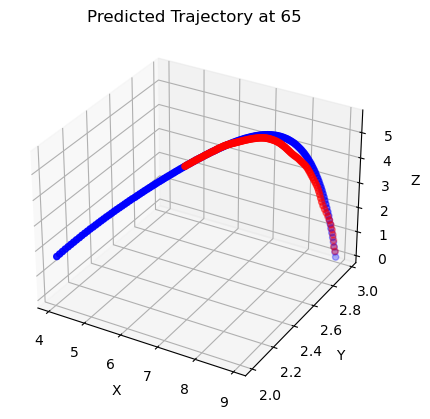

[[[4.05015455 2.00974906 1.68381977]
  [4.09952098 2.01934492 1.76949609]
  [4.14844088 2.02885398 1.85268619]
  [4.19740376 2.0383714  1.93556085]
  [4.24801036 2.04820833 2.01501505]
  [4.29659661 2.05765254 2.09233792]
  [4.34446976 2.06695814 2.16758991]
  [4.39187811 2.07617339 2.24356921]
  [4.44216463 2.0859481  2.31696319]
  [4.48747398 2.09475534 2.39139479]
  [4.53710712 2.10440305 2.4626214 ]
  [4.58344097 2.11340944 2.530294  ]
  [4.62993159 2.1224463  2.60273679]
  [4.67906292 2.13199646 2.66819927]
  [4.72612264 2.14114394 2.7356449 ]
  [4.77202653 2.15006676 2.80136572]
  [4.81800418 2.15900391 2.86679525]
  [4.86318924 2.16778699 2.92915998]
  [4.90874555 2.17664224 2.99357781]
  [4.95561549 2.18575284 3.05344946]
  [5.00166571 2.19470409 3.1157186 ]
  [5.04578099 2.20327923 3.1771659 ]
  [5.08940567 2.21175901 3.23540214]
  [5.13441715 2.22050836 3.29160902]
  [5.17946019 2.22926384 3.34840406]
  [5.22477546 2.23807223 3.4071885 ]
  [5.26675689 2.24623259 3.46173558]
 

1/1 [==============================] - 0s 22ms/step


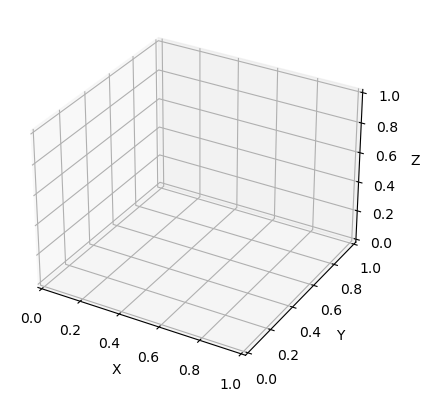

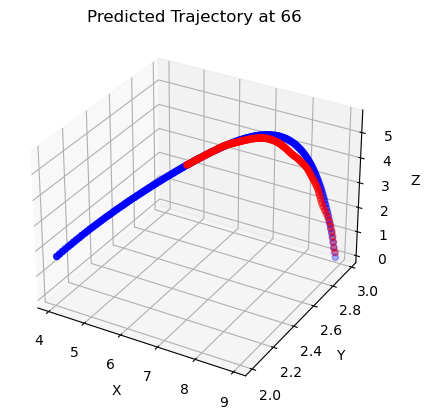

[[[4.05015455 2.00974906 1.68381977]
  [4.09952098 2.01934492 1.76949609]
  [4.14844088 2.02885398 1.85268619]
  [4.19740376 2.0383714  1.93556085]
  [4.24801036 2.04820833 2.01501505]
  [4.29659661 2.05765254 2.09233792]
  [4.34446976 2.06695814 2.16758991]
  [4.39187811 2.07617339 2.24356921]
  [4.44216463 2.0859481  2.31696319]
  [4.48747398 2.09475534 2.39139479]
  [4.53710712 2.10440305 2.4626214 ]
  [4.58344097 2.11340944 2.530294  ]
  [4.62993159 2.1224463  2.60273679]
  [4.67906292 2.13199646 2.66819927]
  [4.72612264 2.14114394 2.7356449 ]
  [4.77202653 2.15006676 2.80136572]
  [4.81800418 2.15900391 2.86679525]
  [4.86318924 2.16778699 2.92915998]
  [4.90874555 2.17664224 2.99357781]
  [4.95561549 2.18575284 3.05344946]
  [5.00166571 2.19470409 3.1157186 ]
  [5.04578099 2.20327923 3.1771659 ]
  [5.08940567 2.21175901 3.23540214]
  [5.13441715 2.22050836 3.29160902]
  [5.17946019 2.22926384 3.34840406]
  [5.22477546 2.23807223 3.4071885 ]
  [5.26675689 2.24623259 3.46173558]
 

1/1 [==============================] - 0s 24ms/step


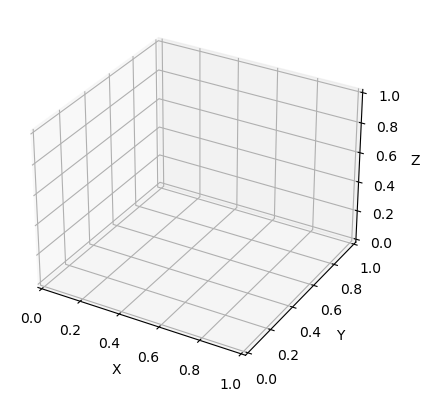

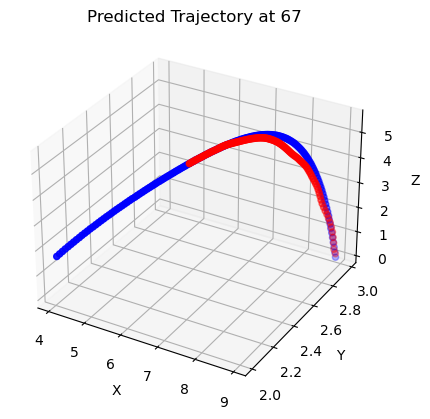

[[[4.05015455 2.00974906 1.68381977]
  [4.09952098 2.01934492 1.76949609]
  [4.14844088 2.02885398 1.85268619]
  [4.19740376 2.0383714  1.93556085]
  [4.24801036 2.04820833 2.01501505]
  [4.29659661 2.05765254 2.09233792]
  [4.34446976 2.06695814 2.16758991]
  [4.39187811 2.07617339 2.24356921]
  [4.44216463 2.0859481  2.31696319]
  [4.48747398 2.09475534 2.39139479]
  [4.53710712 2.10440305 2.4626214 ]
  [4.58344097 2.11340944 2.530294  ]
  [4.62993159 2.1224463  2.60273679]
  [4.67906292 2.13199646 2.66819927]
  [4.72612264 2.14114394 2.7356449 ]
  [4.77202653 2.15006676 2.80136572]
  [4.81800418 2.15900391 2.86679525]
  [4.86318924 2.16778699 2.92915998]
  [4.90874555 2.17664224 2.99357781]
  [4.95561549 2.18575284 3.05344946]
  [5.00166571 2.19470409 3.1157186 ]
  [5.04578099 2.20327923 3.1771659 ]
  [5.08940567 2.21175901 3.23540214]
  [5.13441715 2.22050836 3.29160902]
  [5.17946019 2.22926384 3.34840406]
  [5.22477546 2.23807223 3.4071885 ]
  [5.26675689 2.24623259 3.46173558]
 

1/1 [==============================] - 0s 22ms/step


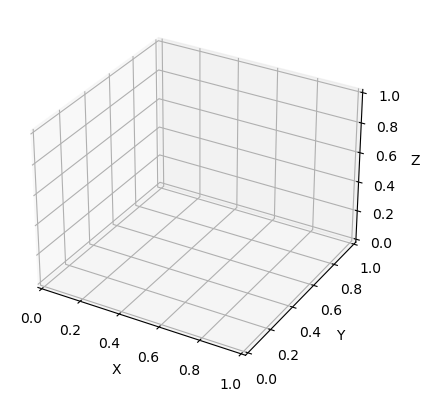

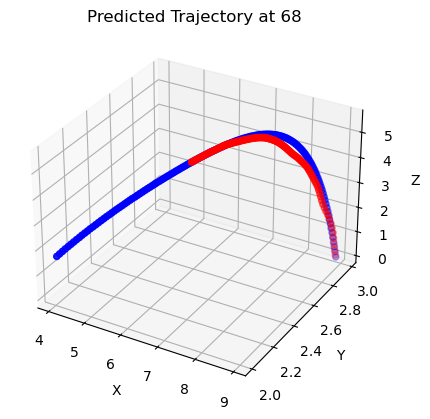

[[[4.05015455 2.00974906 1.68381977]
  [4.09952098 2.01934492 1.76949609]
  [4.14844088 2.02885398 1.85268619]
  [4.19740376 2.0383714  1.93556085]
  [4.24801036 2.04820833 2.01501505]
  [4.29659661 2.05765254 2.09233792]
  [4.34446976 2.06695814 2.16758991]
  [4.39187811 2.07617339 2.24356921]
  [4.44216463 2.0859481  2.31696319]
  [4.48747398 2.09475534 2.39139479]
  [4.53710712 2.10440305 2.4626214 ]
  [4.58344097 2.11340944 2.530294  ]
  [4.62993159 2.1224463  2.60273679]
  [4.67906292 2.13199646 2.66819927]
  [4.72612264 2.14114394 2.7356449 ]
  [4.77202653 2.15006676 2.80136572]
  [4.81800418 2.15900391 2.86679525]
  [4.86318924 2.16778699 2.92915998]
  [4.90874555 2.17664224 2.99357781]
  [4.95561549 2.18575284 3.05344946]
  [5.00166571 2.19470409 3.1157186 ]
  [5.04578099 2.20327923 3.1771659 ]
  [5.08940567 2.21175901 3.23540214]
  [5.13441715 2.22050836 3.29160902]
  [5.17946019 2.22926384 3.34840406]
  [5.22477546 2.23807223 3.4071885 ]
  [5.26675689 2.24623259 3.46173558]
 

1/1 [==============================] - 0s 24ms/step


KeyboardInterrupt: 

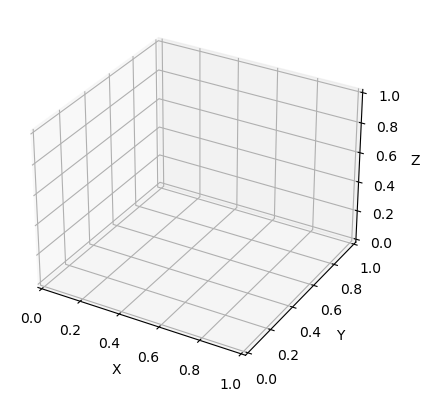

In [18]:
def predictTrajectory(startIndex, shotid):
  testinput = []

  testinput.append(data.loc[data['SHOT_ID'] == shotid][['X', 'Y', 'Z']].values)
  count = len(testinput[0])
  print(count)
  for i in range(startIndex,count):
    testinput = np.array(testinput)
    testdata = [testinput[0,:][i-15:i]]
    testdata = np.array(testdata)
    trajectory = recurcivePredict(testdata,testdata)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f"Predicted Trajectory at {i}")
    ax.scatter(testinput[0,:,0], testinput[0,:,1], testinput[0,:,2], color='b', label='Actual')
    ax.scatter(trajectory[0,:,0], trajectory[0,:,1], trajectory[0,:,2], color='r',label='Predicted')
    plt.show()
    
    time.sleep(5)

predictTrajectory(65,417)

Nicole's attempt to move the robot.

149
1/1 [==============================] - 0s 19ms/step
1.1


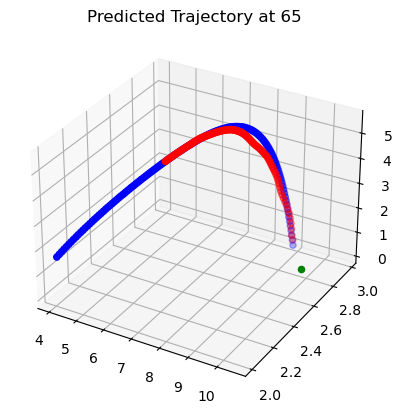

In [61]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import imageio

def predictTrajectory(startIndex, shotid):
    testinput = []

    testinput.append(data.loc[data['SHOT_ID'] == shotid][['X', 'Y', 'Z']].values)
    count = len(testinput[0])
    print(count)
    robotPostion = [10.5,2.59,1.1] #position where robot start, middle of robot service area, z = 1.1 for now
    global frames
    frames = []  # List to store animation frames
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    for i in range(startIndex, count):
        testinput = np.array(testinput)
        testdata = [testinput[0, :][i - 15:i]]
        testdata = np.array(testdata)
        trajectory = recurcivePredict(testdata, testdata)

        #check where robot should move
        arr = trajectory[0, :, 2]
        x=np.where((arr<=1.3) & (arr>=1.0)) # max height = height+0.1, min height= 3/4 of racket's "web" (120-(28*0.75)
        predictedshot = trajectory[0][x] # the point that robot should move toward
        #should be this formula https://math.stackexchange.com/questions/2384610/get-point-on-circumference-of-circle-in-line
        
        ax.cla()  # Clear the axis at each iteration
        ax.set_title(f"Predicted Trajectory at {i}")
        ax.scatter(testinput[0, :, 0], testinput[0, :, 1], testinput[0, :, 2], color='b', label='Actual')
        ax.scatter(trajectory[0, :, 0], trajectory[0, :, 1], trajectory[0, :, 2], color='r', label='Predicted')
        #plot robot
        #make robot a flat circle, https://stackoverflow.com/questions/56870675/how-to-do-a-3d-circle-in-matplotlib
        # with no fill in the circle
        ax.scatter(robotPostion[0], robotPostion[1], robotPostion[2], color='g', label='robot')

        # Save the current figure as an image
        fig.savefig(f"frame_{i}.png")
        # Append the image filename to the frames list
        frames.append(f"frame_{i}.png")
        
        #time.sleep(5)  
        if(i==65): #change break value as needed
              break
    

predictTrajectory(65, 417)
# Create the GIF animation using the frames
# with imageio.get_writer("animation.gif", mode='I', duration=1) as writer:
#     for filename in frames:
#         image = imageio.imread(filename)
#         writer.append_data(image)

Comparing Recursive prediction

In [9]:
testinput = []
testinput.append(data.loc[data['SHOT_ID'] == 461][['X', 'Y', 'Z']].values)
testinput = np.array(testinput)
print(testinput)

[[[4.05070526 3.00265735 1.68365312]
  [4.09845164 3.00515963 1.76971068]
  [4.14823385 3.00776861 1.85123615]
  [4.19835074 3.01039512 1.93446345]
  [4.24682388 3.01293549 2.01421167]
  [4.29444564 3.01543124 2.09082923]
  [4.34479216 3.01806979 2.16907383]
  [4.39231516 3.02056037 2.24225202]
  [4.4405757  3.02308959 2.31631667]
  [4.48970458 3.02566433 2.38992806]
  [4.53797086 3.02819386 2.46098802]
  [4.5845043  3.03063257 2.53187652]
  [4.63192728 3.03311791 2.60079064]
  [4.67741745 3.03550194 2.66934972]
  [4.72596689 3.03804631 2.73838433]
  [4.77125796 3.04041992 2.80198809]
  [4.8191275  3.04292865 2.86708101]
  [4.86353947 3.04525619 2.93141033]
  [4.90979196 3.04768018 2.99339886]
  [4.95598748 3.05010118 3.05388837]
  [5.00109184 3.052465   3.11559358]
  [5.04460372 3.05474536 3.17549797]
  [5.09012844 3.05713121 3.23507084]
  [5.13619699 3.05954556 3.29251584]
  [5.1806407  3.06187476 3.35010363]
  [5.22408629 3.06415164 3.40460417]
  [5.2696617  3.06654015 3.46338072]
 

NameError: name 'trajectory' is not defined

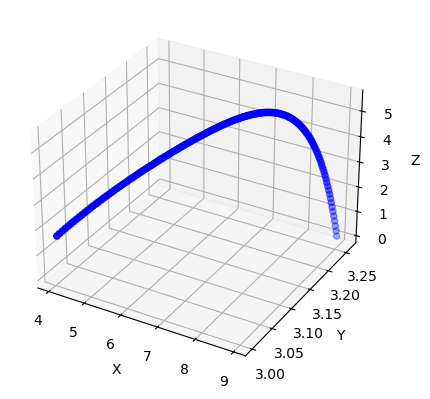

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(testinput[0,:,0], testinput[0,:,1], testinput[0,:,2], color='b', label='Actual')
ax.scatter(trajectory[0,:,0], trajectory[0,:,1], trajectory[0,:,2], color='r',label='Predicted')
plt.show()